In [6]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
from statsmodels.stats.weightstats import ztest as ztest
warnings.filterwarnings('ignore')
participant = '2022_30b'

In [7]:
orig_df = pd.read_csv(f'data/{participant}/gaze.csv')
orig_df.columns

Index(['section id', 'recording id', 'timestamp [ns]', 'gaze x [px]',
       'gaze y [px]', 'worn', 'fixation id', 'blink id'],
      dtype='object')

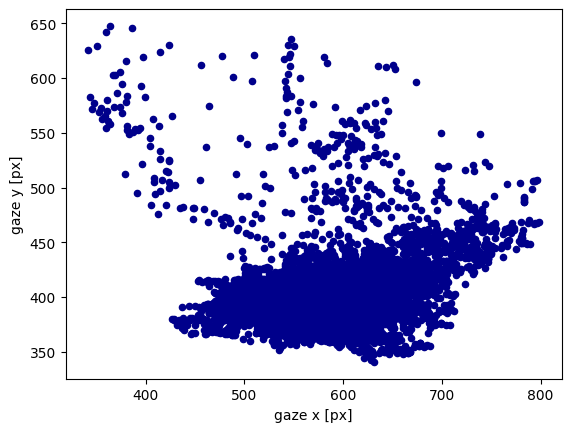

In [8]:
orig_df = pd.read_csv(f'data/{participant}/gaze.csv')
ax1 = orig_df.plot.scatter(x='gaze x [px]',
                       y='gaze y [px]',
                       c='DarkBlue')

In [10]:
orig_df = pd.read_csv(f'data/{participant}/gaze.csv')
orig_df['timestamp [ns]'] = pd.to_datetime(orig_df['timestamp [ns]'])
display(orig_df.head())
print(orig_df.shape)

orig_df.set_index('timestamp [ns]', inplace=True)
required_cols = ['gaze x [px]', 'gaze y [px]']
orig_df = orig_df[required_cols].resample('50ms').mean()

display(orig_df.head())
print(orig_df.shape)


,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id
0,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2021-10-13 08:53:30.211047999,798.302,383.414,1.0,1.0,NaN
1,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2021-10-13 08:53:30.219012999,798.363,383.330,1.0,1.0,NaN
2,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2021-10-13 08:53:30.223001999,798.550,383.480,1.0,1.0,NaN
3,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2021-10-13 08:53:30.227012999,798.827,383.660,1.0,1.0,NaN
4,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2021-10-13 08:53:30.231031999,799.413,383.702,1.0,1.0,NaN


(12761, 8)


,gaze x [px],gaze y [px]
timestamp [ns],,
2021-10-13 08:53:30.200,799.766125,384.9685
2021-10-13 08:53:30.250,811.736700,397.1794
2021-10-13 08:53:30.300,814.524500,390.3614
2021-10-13 08:53:30.350,818.951400,388.7419
2021-10-13 08:53:30.400,814.863400,389.6955


(1278, 2)


In [2]:
orig_df = pd.read_csv(f'{participant}/{participant}/gaze.csv')
display(orig_df.head())

"""
Pre-processing
"""
orig_df['shifted_timestamp'] = orig_df['timestamp [ns]'].shift(-1)
orig_df['row_duration'] = (orig_df['shifted_timestamp'] - orig_df['timestamp [ns]'])/1e6
orig_df['saccade id'] = None
for index, row in orig_df.iterrows():
    if index == 0:
        continue
    
    if row['fixation id'] != row['fixation id']: #NaN for missing values
        # get prev fixation id value
        if orig_df['fixation id'][index-1] == orig_df['fixation id'][index-1]:
            orig_df.loc[index, 'saccade id'] = orig_df['fixation id'][index-1]
        else:
            orig_df.loc[index, 'saccade id'] = orig_df['saccade id'][index-1]

display(orig_df.head())

,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id
0,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,1634115210211047999,798.302,383.414,1.0,1.0,NaN
1,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,1634115210219012999,798.363,383.330,1.0,1.0,NaN
2,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,1634115210223001999,798.550,383.480,1.0,1.0,NaN
3,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,1634115210227012999,798.827,383.660,1.0,1.0,NaN
4,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,1634115210231031999,799.413,383.702,1.0,1.0,NaN


,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,shifted_timestamp,row_duration,saccade id
0,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,1634115210211047999,798.302,383.414,1.0,1.0,NaN,1.634115e+18,7.965184,None
1,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,1634115210219012999,798.363,383.330,1.0,1.0,NaN,1.634115e+18,3.988992,None
2,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,1634115210223001999,798.550,383.480,1.0,1.0,NaN,1.634115e+18,4.011008,None
3,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,1634115210227012999,798.827,383.660,1.0,1.0,NaN,1.634115e+18,4.018944,None
4,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,1634115210231031999,799.413,383.702,1.0,1.0,NaN,1.634115e+18,7.972864,None


In [3]:
updated_df = pd.read_csv(f'heatmap/output/updated_gaze_{participant}.csv')
display(updated_df.head())

"""
Pre-processing
"""
updated_df['shifted_timestamp'] = updated_df['timestamp [ns]'].shift(-1)
updated_df['row_duration'] = (updated_df['shifted_timestamp'] - updated_df['timestamp [ns]'])
updated_df['saccade id'] = None

for index, row in updated_df.iterrows():
    if index == 0:
        continue
    
    if row['fixation id'] != row['fixation id']: #NaN for missing values
        # get prev fixation id value
        if updated_df['fixation id'][index-1] == updated_df['fixation id'][index-1]:
            updated_df.loc[index, 'saccade id'] = updated_df['fixation id'][index-1]
        else:
            updated_df.loc[index, 'saccade id'] = updated_df['saccade id'][index-1]

display(updated_df.head())

,index,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,ref_x_pixel,ref_y_pixel
0,565,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2827.984,636.907,455.851,1.0,6.0,NaN,637,636
1,572,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2864.005,640.139,457.220,1.0,6.0,NaN,641,638
2,576,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2883.990,635.692,455.496,1.0,6.0,NaN,637,632
3,583,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2919.971,633.519,453.602,1.0,6.0,NaN,636,628
4,592,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2964.003,635.146,453.744,1.0,6.0,NaN,637,629


,index,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,ref_x_pixel,ref_y_pixel,shifted_timestamp,row_duration,saccade id
0,565,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2827.984,636.907,455.851,1.0,6.0,NaN,637,636,2864.005,36.021,None
1,572,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2864.005,640.139,457.220,1.0,6.0,NaN,641,638,2883.990,19.985,None
2,576,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2883.990,635.692,455.496,1.0,6.0,NaN,637,632,2919.971,35.981,None
3,583,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2919.971,633.519,453.602,1.0,6.0,NaN,636,628,2964.003,44.032,None
4,592,2e6f4a06-a571-41f0-b900-95045283f3a4,d2d92991-4b37-4b41-93dd-617b24b9b28a,2964.003,635.146,453.744,1.0,6.0,NaN,637,629,2995.989,31.986,None


In [4]:
updated_df['ref_x_pixel_diff'] = updated_df['ref_x_pixel'] - updated_df['gaze x [px]']
updated_df['ref_y_pixel_diff'] = updated_df['ref_y_pixel'] - updated_df['gaze y [px]']

updated_df[['ref_x_pixel_diff', 'ref_y_pixel_diff']].describe()

,ref_x_pixel_diff,ref_y_pixel_diff
count,1884.000000,1884.000000
mean,116.505596,119.826431
std,47.510734,204.983747
min,-494.268000,-842.164000
25%,96.077750,40.167500
50%,131.748000,145.637000
75%,143.161000,256.184000
max,849.708000,501.203000


In [5]:
"""
Basic Analysis
"""
print('################### Original Data ###############################')
print(f'Average row (data capture) duration - {orig_df["row_duration"].mean():.3f} (ms)')
print(f'Total number of fixations - {orig_df["fixation id"].nunique()}')
print(f'Total number of saccades - {orig_df["saccade id"].nunique()}')


print('################### Updated Data ###############################')
print(f'Average row (data capture) duration - {updated_df["row_duration"].mean():.3f} (ms)')
print(f'Total number of fixations - {updated_df["fixation id"].nunique()}')
print(f'Total number of saccades - {updated_df["saccade id"].nunique()}')

################### Original Data ###############################
Average row (data capture) duration - 5.007 (ms)
Total number of fixations - 138
Total number of saccades - 138
################### Updated Data ###############################
Average row (data capture) duration - 32.427 (ms)
Total number of fixations - 133
Total number of saccades - 124


,count,mean,std,min,25%,50%,75%,max
Original Data fixations durations,138.0,381.847686,288.198135,64.043008,179.977856,291.998592,494.9568,1696.020992


,count,mean,std,min,25%,50%,75%,max
Updated Data fixation durations,133.0,377.878105,287.06444,55.986,172.059,300.013,492.049,1692.347


Zscore - -0.2271446067061573, Pval - 0.8203112992820225


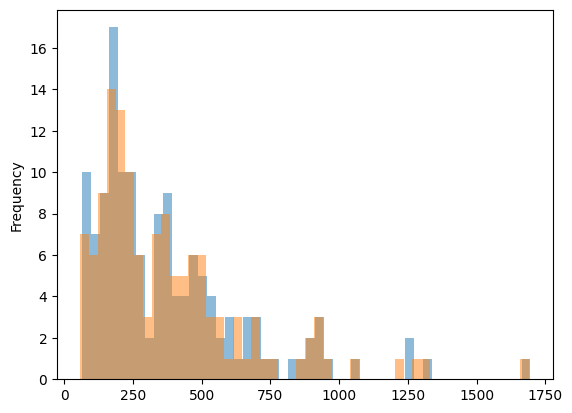

In [9]:
"""
Fixation Analysis - Duration (ms)
"""
orig_fixation = orig_df.groupby('fixation id').sum().reset_index()
orig_fixation = orig_fixation[['fixation id', 'row_duration']]
display(orig_fixation[['row_duration']].describe().rename(columns={"row_duration":'Original Data fixations durations'}).T)
ax = orig_fixation['row_duration'].plot.hist(bins=50, alpha=0.5)

updated_fixation = updated_df.groupby('fixation id').sum().reset_index()
updated_fixation = updated_fixation[['fixation id', 'row_duration']]
display(updated_fixation[['row_duration']].describe().rename(columns={"row_duration":'Updated Data fixation durations'}).T)
ax = updated_fixation['row_duration'].plot.hist(bins=50, alpha=0.5)

zscore, pval = ztest(updated_fixation['row_duration'], orig_fixation['row_duration'], value=abs(updated_fixation['row_duration'].mean() - orig_fixation['row_duration'].mean())) 
print(f'Zscore - {zscore}, Pval - {pval}')

,count,mean,std,min,25%,50%,75%,max
saccades,138.0,81.11096,70.28138,16.219904,36.051072,44.066432,108.036544,339.974144


,count,mean,std,min,25%,50%,75%,max
saccades,124.0,87.117105,70.43682,19.969,35.97225,63.979,115.94375,351.996


Zscore - 0.6899233076509352, Pval - 0.4902424176294743


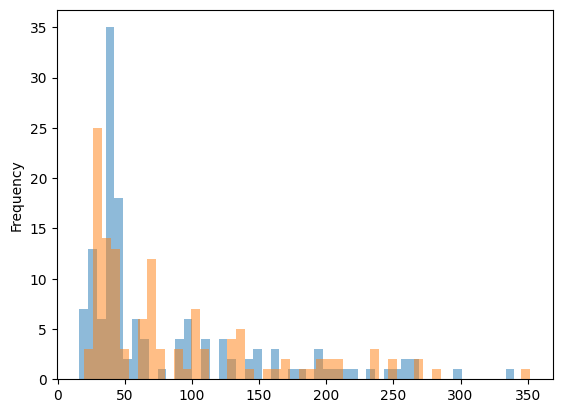

In [10]:
"""
Saccade Analysis - Duration (ms)
"""
orig_saccade = orig_df.groupby('saccade id').sum().reset_index()
orig_saccade = orig_saccade[['saccade id', 'row_duration']]
display(orig_saccade[['row_duration']].describe().rename(columns={"row_duration":'saccades'}).T)
ax = orig_saccade['row_duration'].plot.hist(bins=50, alpha=0.5)

updated_saccade = updated_df.groupby('saccade id').sum().reset_index()
updated_saccade = updated_saccade[['saccade id', 'row_duration']]
display(updated_saccade[['row_duration']].describe().rename(columns={"row_duration":'saccades'}).T)
ax = updated_saccade['row_duration'].plot.hist(bins=50, alpha=0.5)

zscore, pval = ztest(updated_saccade['row_duration'], orig_saccade['row_duration']) 
print(f'Zscore - {zscore}, Pval - {pval}')


,count,mean,std,min,25%,50%,75%,max
amplitude,138.0,160.226674,115.884994,4.684553,68.39835,137.780605,246.991618,552.756609


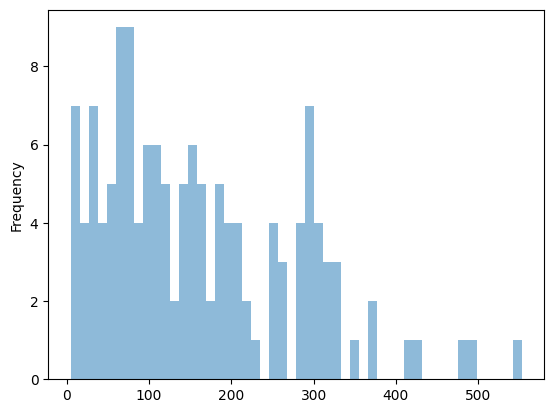

In [6]:
"""
Fixation Analysis - Amplitude
"""
def calculate_amplitute(df):
    df.reset_index(drop=True, inplace=True)
    starting_x = df['gaze x [px]'][0]
    starting_y = df['gaze x [px]'][0]
    ending_x = df['gaze x [px]'].iloc[-1]
    ending_y = df['gaze y [px]'].iloc[-1]
    amplitude =  math.dist((starting_x, starting_y), (ending_x, ending_y))
    return pd.DataFrame({"amplitude":[amplitude]})

fixation_amplitude = df.groupby('fixation id').apply(calculate_amplitute).reset_index()
if 'level_1' in fixation_amplitude.columns:
    fixation_amplitude.drop(columns=['level_1'], inplace=True)

display(fixation_amplitude[['amplitude']].describe().T)
ax = fixation_amplitude['amplitude'].plot.hist(bins=50, alpha=0.5)

,count,mean,std,min,25%,50%,75%,max
amplitude,138.0,180.691738,116.203097,4.016998,88.074125,159.176969,257.65236,597.685874


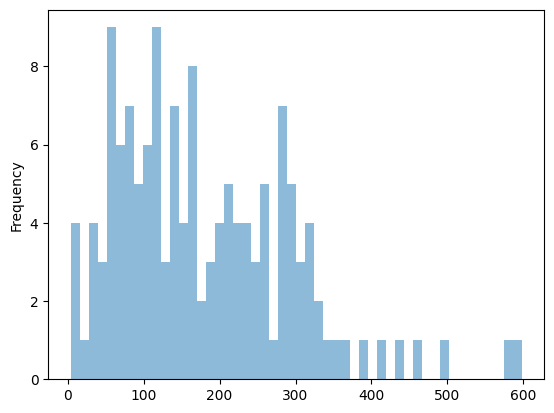

In [36]:
"""
Saccade Analysis - Amplitude
"""
saccade_amplitude = df.groupby('saccade id').apply(calculate_amplitute).reset_index()
if 'level_1' in saccade_amplitude.columns:
    saccade_amplitude.drop(columns=['level_1'], inplace=True)

display(saccade_amplitude[['amplitude']].describe().T)
ax = saccade_amplitude['amplitude'].plot.hist(bins=50, alpha=0.5)

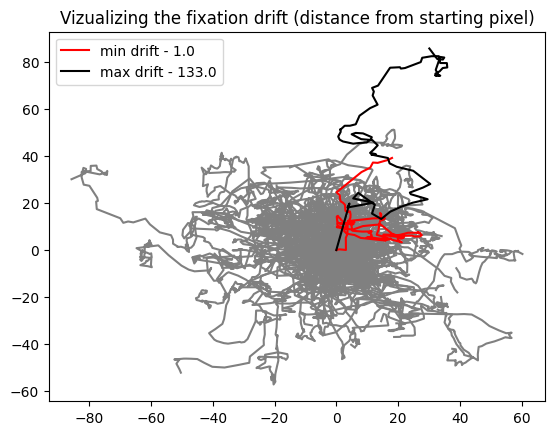

In [8]:
"""
Vizualizing the fixations
"""
min_drift = math.inf
max_drift = -math.inf
min_drift_id = 0
max_drift_id = 0
for fixation in df['fixation id'].unique():
    if fixation != fixation:
        continue
    temp = df[df['fixation id'] == fixation].copy()
    temp.reset_index(drop=True, inplace=True)
    baseline_x = temp['gaze x [px]'][0]
    temp['gaze x [px]'] = temp['gaze x [px]'] - baseline_x
    temp['gaze x [px]'] = (temp['gaze x [px]'])

    baseline_y = temp['gaze y [px]'][0]
    temp['gaze y [px]'] = temp['gaze y [px]'] - baseline_y
    temp['gaze y [px]'] = (temp['gaze y [px]'])

    distance_list = [math.dist((0, 0), (x, y)) for x, y in zip(temp['gaze x [px]'], temp['gaze y [px]'])]

    if min(distance_list) < min_drift:
        min_drift = min(distance_list)
        min_drift_id = fixation
    
    if max(distance_list) > max_drift:
        max_drift = max(distance_list)
        max_drift_id = fixation

    x = [x for x in range(len(temp['gaze x [px]']))]
    plt.plot(temp['gaze y [px]'], temp['gaze x [px]'], color='grey')

plt.title('Vizualizing the fixation drift (distance from starting pixel)')
temp = df[df['fixation id'] == min_drift_id]
temp.reset_index(drop=True, inplace=True)
baseline_x = temp['gaze x [px]'][0]
temp['gaze x [px]'] = temp['gaze x [px]'] - baseline_x
temp['gaze x [px]'] = abs(temp['gaze x [px]'])

baseline_y = temp['gaze y [px]'][0]
temp['gaze y [px]'] = temp['gaze y [px]'] - baseline_y
temp['gaze y [px]'] = abs(temp['gaze y [px]'])
plt.plot(temp['gaze x [px]'], temp['gaze y [px]'], color='red', label=f'min drift - {min_drift_id}')

temp = df[df['fixation id'] == max_drift_id]
temp.reset_index(drop=True, inplace=True)
baseline_x = temp['gaze x [px]'][0]
temp['gaze x [px]'] = temp['gaze x [px]'] - baseline_x
temp['gaze x [px]'] = abs(temp['gaze x [px]'])

baseline_y = temp['gaze y [px]'][0]
temp['gaze y [px]'] = temp['gaze y [px]'] - baseline_y
temp['gaze y [px]'] = abs(temp['gaze y [px]'])
plt.plot(temp['gaze x [px]'], temp['gaze y [px]'], color='black', label=f'max drift - {max_drift_id}')

plt.legend()
plt.show()

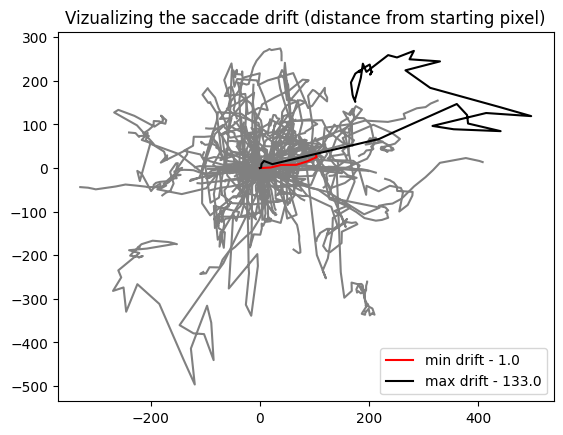

In [14]:
"""
Vizualizing the saccades drift
"""
min_drift = math.inf
max_drift = -math.inf
min_drift_id = 0
max_drift_id = 0
for saccade in df['saccade id'].unique():
    ewm_span = 500
    if (saccade != saccade) or saccade == None:
        continue
    temp = df[df['saccade id'] == saccade].copy()
    temp.reset_index(drop=True, inplace=True)
    baseline_x = temp['gaze x [px]'][0]
    temp['gaze x [px]'] = temp['gaze x [px]'] - baseline_x
    #temp['gaze x [px]'] = (temp['gaze x [px]']).ewm(span=ewm_span).mean()

    baseline_y = temp['gaze y [px]'][0]
    temp['gaze y [px]'] = temp['gaze y [px]'] - baseline_y
    #temp['gaze y [px]'] = temp['gaze y [px]'].ewm(span=ewm_span).mean()

    distance_list = [math.dist((0, 0), (x, y)) for x, y in zip(temp['gaze x [px]'], temp['gaze y [px]'])]

    if min(distance_list) < min_drift:
        min_drift = min(distance_list)
        min_drift_id = saccade
    
    if max(distance_list) > max_drift:
        max_drift = max(distance_list)
        max_drift_id = saccade

    x = [x for x in range(len(temp['gaze x [px]']))]
    plt.plot(temp['gaze y [px]'], temp['gaze x [px]'], color='grey')

plt.title('Vizualizing the saccade drift (distance from starting pixel)')
temp = df[df['saccade id'] == min_drift_id]
temp.shape
temp.reset_index(drop=True, inplace=True)
baseline_x = temp['gaze x [px]'][0]
temp['gaze x [px]'] = temp['gaze x [px]'] - baseline_x
temp['gaze x [px]'] = abs(temp['gaze x [px]'])

baseline_y = temp['gaze y [px]'][0]
temp['gaze y [px]'] = temp['gaze y [px]'] - baseline_y
temp['gaze y [px]'] = abs(temp['gaze y [px]'])
plt.plot(temp['gaze x [px]'], temp['gaze y [px]'], color='red', label=f'min drift - {min_drift_id}')

temp = df[df['saccade id'] == max_drift_id]
temp.reset_index(drop=True, inplace=True)
baseline_x = temp['gaze x [px]'][0]
temp['gaze x [px]'] = temp['gaze x [px]'] - baseline_x
temp['gaze x [px]'] = abs(temp['gaze x [px]'])

baseline_y = temp['gaze y [px]'][0]
temp['gaze y [px]'] = temp['gaze y [px]'] - baseline_y
temp['gaze y [px]'] = abs(temp['gaze y [px]'])
plt.plot(temp['gaze x [px]'], temp['gaze y [px]'], color='black', label=f'max drift - {max_drift_id}')

plt.legend()
plt.show()

In [ ]:
"""
Questions/Observations: 
1. How to compare 'amplitude' of fixations/saccades across multiple participants due to difference in prespective? 
For someone standing close by, one pixel could be an inch, but for someone far away, one pixel could be 6 inches
How does this impact the definition of a fixation/saccade? (by us or by pupil invisible)

2. OpenCV frames are processed in 50 millisecond increments, while the rows seem to be ~5 ms. 

3. There appear to be 133 fixations, but 124 saccades (which seems like a bug) in the new gaze.csv file

4. How to determine spatial similarity for the saccades/fixations? Is it from the staring point or from the previous gaze point? 

5. Would comparing the distributions and mean statistics count towards QC? 


"""